TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from nltk.corpus import stopwords
from autoscraper import AutoScraper
import re

In [44]:
# !pip install AutoScraper

# Positive Words List


In [4]:
pos = pd.read_csv('positive-words.txt',sep='\n',  encoding='cp1252',header=None)
pos.iloc[30:40,:]

,0
30,; mistakes. They are included as these m...
31,; frequently in social media content.
32,;
33,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
34,a+
35,abound
36,abounds
37,abundance
38,abundant
39,accessable


In [5]:
pos[pos[0]=='a+'].index.values

array([34], dtype=int64)

In [6]:
pos.drop(range(0,35),axis=0,inplace=True)
pos.reset_index(inplace=True)

In [7]:
pos.drop(labels=['index'],axis=1,inplace=True)
pos.head()

,0
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [8]:
pos['Estimate']=np.ones(shape=(pos.shape[0]),dtype=int)

In [9]:
pos

,0,Estimate
0,abound,1
1,abounds,1
2,abundance,1
3,abundant,1
4,accessable,1
...,...,...
2000,youthful,1
2001,zeal,1
2002,zenith,1
2003,zest,1


# Negative Words List

In [10]:
neg = pd.read_csv('negative-words.txt',sep='\n',  encoding='cp1252',header=None , )
neg.head()

,0
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
1,;
2,; Opinion Lexicon: Negative
3,;
4,; This file contains a list of NEGATIVE opinio...


In [11]:
neg[neg[0]=='2-faces'].index.values

array([35], dtype=int64)

In [12]:
neg.drop(range(0,36),axis=0,inplace=True)
neg.reset_index(inplace=True)

In [13]:
neg.drop(labels=['index'],axis=1,inplace=True)
neg.head()

,0
0,abnormal
1,abolish
2,abominable
3,abominably
4,abominate


In [14]:
neg['Estimate']=[-1 for i in range(0,neg.shape[0])]

In [15]:
neg

,0,Estimate
0,abnormal,-1
1,abolish,-1
2,abominable,-1
3,abominably,-1
4,abominate,-1
...,...,...
4776,zaps,-1
4777,zealot,-1
4778,zealous,-1
4779,zealously,-1


In [16]:
#Combining positive and negative
all_words = neg.append(pos)
all_words

,0,Estimate
0,abnormal,-1
1,abolish,-1
2,abominable,-1
3,abominably,-1
4,abominate,-1
...,...,...
2000,youthful,1
2001,zeal,1
2002,zenith,1
2003,zest,1


# Stop Words

In [17]:
stop1 = stopwords.words('english')
list(stop1)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
stop2=pd.read_csv('stop.txt',sep='\n',  encoding='cp1252',header=None)
stop2=np.array(stop2).flatten()
stop2=list(stop2)
stop2

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [20]:
stop=stop1+stop2
print(len(stop))
stop3=set(stop)
print(len(stop3))

750
599


# ExcelR Review


In [21]:
url='https://www.excelr.com/testimonials'

In [22]:
wanted_list=['Productive Training with clear explanation could require more reading material. Overall good and useful training.']

In [23]:
scrap=AutoScraper()


In [24]:
result=scrap.build(url,wanted_list)

In [25]:
result

['Good',
 'Productive Training with clear explanation could require more reading material. Overall good and useful training.',
 'Could understand the basics of boom and feel confident for certification and to work on boom fool as well. Thanks.',
 'Useful training intern of project & Business requirement excellent use case materials & senarios . overall this is good',
 'The Training provided by krishna sir was excellent.',
 'The 4 days training course was very effective. the trainer played a key role in explained each concept in dept.',
 'Great',
 'Teaching method and examples were good. Pace was bit fast & Training material is missing content intro page but overall it was a great experience.',
 'Trainer is very professional and effective speaker. we will able to group data as much as possible interactive session made it a success.',
 'Excellent',
 'Well planed course and Could relate with real time examples at work.',
 'Well explained course with real time examples. which helped me to 

In [26]:
len(result)

1381

# Preprocessing the text

In [27]:
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()

In [28]:
X=[]
for i in range(len(result)):
    sent=result[i].strip()
    sent=re.sub(r'[^a-zA-z]',' ',result[i])
    sent=re.sub('_',' ',sent)
    sent=sent.lower()
    words=nltk.word_tokenize(sent)
    sent=[wnl.lemmatize(word) for word in words if not word in stop3]
    sent=' '.join(sent)
    X.append(sent)

In [29]:
X

['good',
 'productive training clear explanation require reading material good training',
 'understand basic boom feel confident certification work boom fool',
 'training intern project business requirement excellent case material senarios good',
 'training provided krishna sir excellent',
 'day training effective trainer played key role explained concept dept',
 'great',
 'teaching method example good pace bit fast training material missing content intro page great experience',
 'trainer professional effective speaker group data interactive session made success',
 'excellent',
 'planed relate real time example work',
 'explained real time example helped relate',
 'organized easy understand',
 'effective instructor gave real time example connect concept',
 'pmp training engaging concept explained example krishna',
 'structured training easy understand good online support',
 'valuable training krishna sir provided good example easily relates topic',
 'structured pm book easy understand'

In [30]:
text=' '.join(X)
text

'good productive training clear explanation require reading material good training understand basic boom feel confident certification work boom fool training intern project business requirement excellent case material senarios good training provided krishna sir excellent day training effective trainer played key role explained concept dept great teaching method example good pace bit fast training material missing content intro page great experience trainer professional effective speaker group data interactive session made success excellent planed relate real time example work explained real time example helped relate organized easy understand effective instructor gave real time example connect concept pmp training engaging concept explained example krishna structured training easy understand good online support valuable training krishna sir provided good example easily relates topic structured pm book easy understand training provided excellent key area covered clear explanation releva

In [31]:

# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

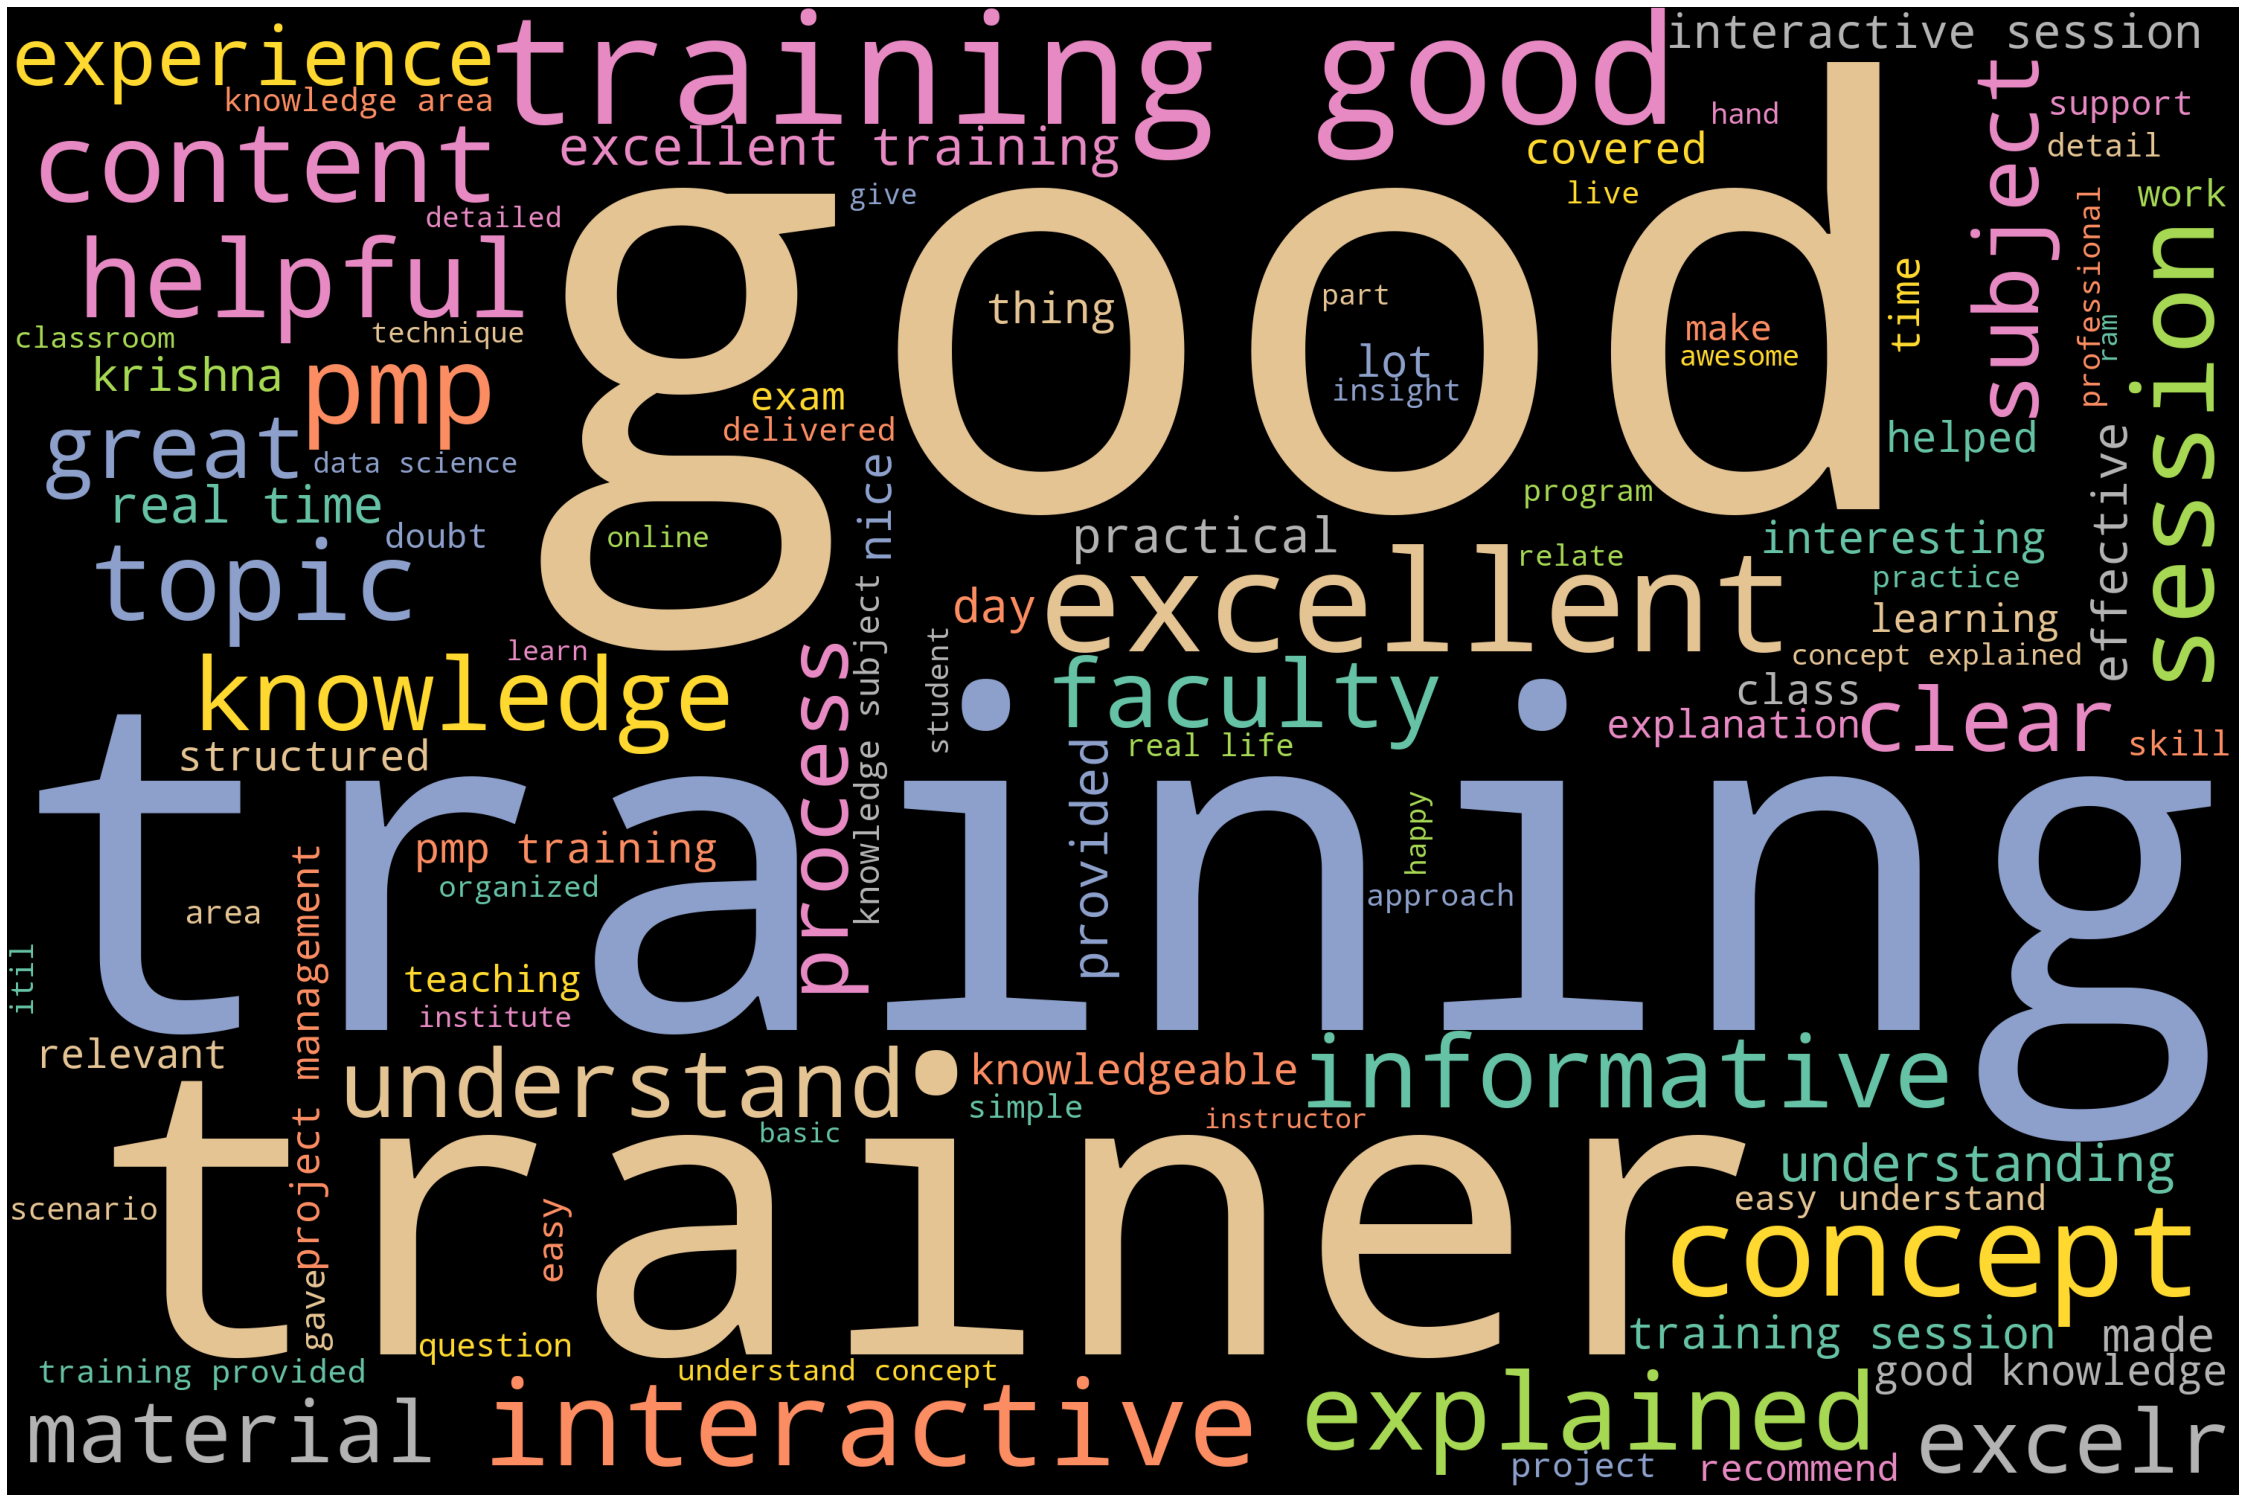

In [32]:
# Generate wordcloud
stop.append('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stop).generate(text)
# Plot
plot_cloud(wordcloud)

In [33]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")
doc_block = nlp(text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [34]:
all_scores = all_words.set_index(0)['Estimate'].to_dict()
all_scores

{'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1,
 'admonisher': -1,
 'admonishi

In [35]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = all_scores

def calculate_sentiment(result: str = None):
    sent_score = 0
    if result:
        sentence = nlp(result)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [36]:
# test that it works
calculate_sentiment(result = 'amazing')

1

In [37]:
df=pd.DataFrame({'Reviews':result , 'Cleaned_text' : X })
df

,Reviews,Cleaned_text
0,Good,good
1,Productive Training with clear explanation cou...,productive training clear explanation require ...
2,Could understand the basics of boom and feel c...,understand basic boom feel confident certifica...
3,Useful training intern of project & Business r...,training intern project business requirement e...
4,The Training provided by krishna sir was excel...,training provided krishna sir excellent
...,...,...
1376,Very interactive trainer with lot of simple ex...,interactive trainer lot simple example easy un...
1377,The Overall Training was nice. The sad part is...,training nice sad part missed half session due...
1378,"Training was very helpful, very interactive an...",training helpful interactive practical
1379,Overall Training was excellent. Trainer was we...,training excellent trainer versed knowledge de...


In [38]:
df['sentiment_value'] = df['Cleaned_text'].apply(calculate_sentiment)


In [39]:
df

,Reviews,Cleaned_text,sentiment_value
0,Good,good,1
1,Productive Training with clear explanation cou...,productive training clear explanation require ...,3
2,Could understand the basics of boom and feel c...,understand basic boom feel confident certifica...,3
3,Useful training intern of project & Business r...,training intern project business requirement e...,2
4,The Training provided by krishna sir was excel...,training provided krishna sir excellent,1
...,...,...,...
1376,Very interactive trainer with lot of simple ex...,interactive trainer lot simple example easy un...,1
1377,The Overall Training was nice. The sad part is...,training nice sad part missed half session due...,-1
1378,"Training was very helpful, very interactive an...",training helpful interactive practical,1
1379,Overall Training was excellent. Trainer was we...,training excellent trainer versed knowledge de...,2


In [40]:
# how many words are in the sentence?
df['word_count'] = df['Reviews'].str.split().apply(len)
df['word_count'].sort_values(ascending=False).head(20)

403     106
1350     99
492      99
468      98
701      95
704      91
1330     91
794      90
513      81
732      81
1301     78
611      78
695      77
1344     76
404      76
795      74
506      70
487      69
445      66
763      64
Name: word_count, dtype: int64

# High Positive Reviews

In [41]:
df.sort_values(by='sentiment_value').tail(15)

,Reviews,Cleaned_text,sentiment_value,word_count
1330,"People who look at the PMBOK, would never ever...",people pmbok urge open start reading book dry ...,6,91
620,"""The Training of the PMP course has been prett...",training pmp pretty good content summarized ma...,6,61
271,Excellent training with real world scenario em...,excellent training real world scenario empower...,6,16
492,It was a sheer pleasure to be part of the Busi...,sheer pleasure part business analytics offered...,6,99
657,excellent trainer. just loved the experience o...,excellent trainer loved experience itil traini...,6,40
85,"The training was clear, concise with good amou...",training clear concise good amount depth term ...,6,37
1175,"""Iam felling happy & proud to put the feedback...",iam felling happy proud put feedback session d...,6,45
1004,"""Fantastic Training experience with ExcelR. Tr...",fantastic training experience excelr trainer m...,6,61
611,This course was worth every penny. Krishnamraj...,worth penny krishnamraj great instructor accom...,6,78
690,"""PMP training given by Ram Tavva was excellent...",pmp training ram tavva excellent made dry subj...,7,63


<AxesSubplot:xlabel='sentiment_value', ylabel='Count'>

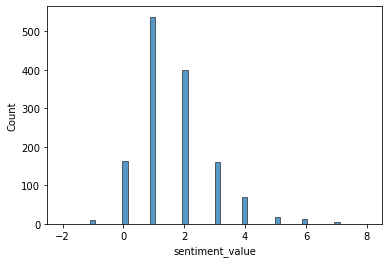

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['sentiment_value'])

<AxesSubplot:title={'center':'Sentiment Value v/s Sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

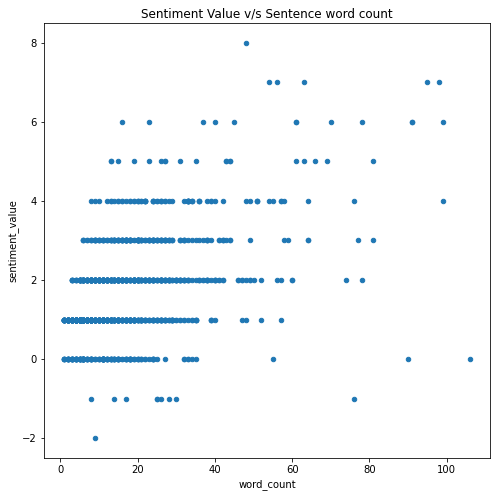

In [43]:
df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentiment Value v/s Sentence word count')
